In [1]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    m = m+m.T+np.eye(264)
    return m

def vec2mat2(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    m = m+m.T
    return m

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [50]:
# Load FC

import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC/'
pncdir2 = '/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/'
demo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

rest = []
nback = []
emoid = []
restpc = []
nbackpc = []
emoidpc = []
race = []
sex = []
age = []
wrat = []
subids = []

a,b = np.triu_indices(264,1)
i=0

for sub in demo['age_at_cnb']:
    i += 1
    continue
    try:
        ra = demo['Race'][sub]
        ag = demo['age_at_cnb'][sub]
        se = demo['Sex'][sub]
        if ra not in ['AA', 'EA']:
            continue
        ra = ra == 'AA'
        se = se == 'M'
        r = np.load(f'{pncdir}/fc/{sub}_task-rest_fc.npy')
        n = np.load(f'{pncdir}/fc/{sub}_task-nback_fc.npy')
        e = np.load(f'{pncdir}/fc/{sub}_task-emoid_fc.npy')
        race.append(ra)
        sex.append(se)
        age.append(ag)
        rest.append(remap(vec2mat(r))[a,b])
        nback.append(remap(vec2mat(n))[a,b])
        emoid.append(remap(vec2mat(e))[a,b])
        subids.append(sub)
        r = np.load(f'{pncdir2}/pc/{sub}_task-rest_pc.npy')
        n = np.load(f'{pncdir2}/pc/{sub}_task-nback_pc.npy')
        e = np.load(f'{pncdir2}/pc/{sub}_task-emoid_pc.npy')
        restpc.append(r)
        nbackpc.append(n)
        emoidpc.append(e)
    except:
        pass

print(i)

rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)
restpc = np.stack(restpc)
nbackpc = np.stack(nbackpc)
emoidpc = np.stack(emoidpc)
race = np.array(race).astype('int')
sex = np.array(sex).astype('int')
age = np.array(age)

age = (age - np.mean(age)) / np.std(age)

print([a.shape for a in [rest, nback, emoid, restpc, nbackpc, emoidpc, race, sex, age]])

1529


ValueError: need at least one array to stack

In [3]:
restfilt = pickle.load(open('/home/anton/Documents/Tulane/Research/PNC_Good/PNC_SPM_rest_good_filt.pkl', 'rb'))

restfilt[subids[0]]

array([[ 4.39450722e-02, -2.69750297e+00, -9.84149701e-01, ...,
         1.09901698e+01,  5.15356240e+00,  2.86912853e-01],
       [ 4.90860564e-03,  4.50911442e-01,  3.82218237e-01, ...,
         1.92644801e+00, -1.23596908e+00, -6.84885362e-03],
       [ 1.92680720e-01,  2.05116940e+00,  9.05542553e-01, ...,
        -7.11320125e+00, -4.28894152e+00, -1.10697914e+00],
       ...,
       [ 1.38467675e-01,  7.06883750e-01,  8.22373850e-01, ...,
         7.29108783e+00,  3.39760931e+00,  9.06762978e-02],
       [ 9.91936070e-02,  8.18461345e+00,  5.99955389e+00, ...,
        -4.55099285e+00, -2.35526035e+00,  7.27023862e-01],
       [ 3.22484773e-02,  9.23545298e-01,  1.66491203e+00, ...,
        -3.82863241e+00, -2.84746310e+00,  2.80103845e-01]])

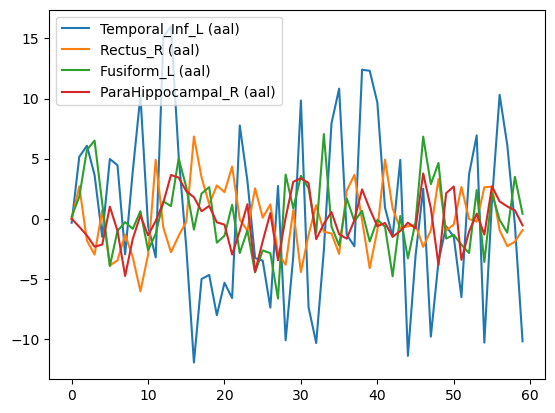

In [17]:
import matplotlib.pyplot as plt

plt.plot(restfilt[subids[0]][3:7,:60].T, label=('Temporal_Inf_L (aal)', 'Rectus_R (aal)', 'Fusiform_L (aal)', 'ParaHippocampal_R (aal)'))
plt.legend()
plt.show()

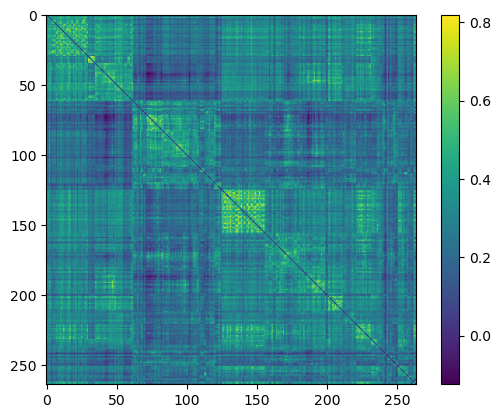

In [10]:
import matplotlib.pyplot as plt

plt.imshow(vec2mat2(rrest[1]))
plt.colorbar()
plt.show()

In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, fcd, ld):
        super(VAE, self).__init__()
        self.fcd = fcd
        self.ld = ld
        self.enc1 = nn.Linear(fcd, 1000).float().cuda()
        self.enc2 = nn.Linear(1000, ld).float().cuda()
        self.dec1 = nn.Linear(ld+6, 1000).float().cuda()
        self.dec2 = nn.Linear(1000, fcd).float().cuda()

    def enc(self, x):
        x = F.relu(self.enc1(x))
        z = self.enc2(x)
        return z

    def gen(self, n):
        return torch.randn(n, self.ld).float().cuda()/(10**0.5)
    
    def dec(self, z, age, sex, race, rest, nback, emoid):
        z = torch.cat([z, age.unsqueeze(1), sex.unsqueeze(1), race.unsqueeze(1), 
                       rest.unsqueeze(1), nback.unsqueeze(1), emoid.unsqueeze(1)], dim=1)
        x = F.relu(self.dec1(z))
        x = self.dec2(x)
        return x

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

def pretty(x):
    return f'{round(float(x), 4)}'

vae = VAE(34716, 30)
vae.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/vae_1000_z30_cov6.torch'))
vae.eval()

with torch.no_grad():
    zrest = vae.enc(torch.from_numpy(rest).float().cuda())
    znback = vae.enc(torch.from_numpy(nback).float().cuda())
    zemoid = vae.enc(torch.from_numpy(emoid).float().cuda())
    task = torch.ones(len(rest)).float().cuda()
    age_t = torch.from_numpy(age).float().cuda()
    sex_t = torch.from_numpy(sex).float().cuda()
    race_t = torch.from_numpy(race).float().cuda()
    rrest = vae.dec(zrest, age_t, sex_t, race_t, 1*task, 0*task, 0*task).detach().cpu().numpy()
    nnback = vae.dec(znback, age_t, sex_t, race_t, 0*task, 1*task, 0*task).detach().cpu().numpy()
    eemoid = vae.dec(zemoid, age_t, sex_t, race_t, 0*task, 0*task, 1*task).detach().cpu().numpy()

print('Done')

Done


In [83]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, fcd, ld, rois, rank):
        super(VAE, self).__init__()
        self.fcd = fcd
        self.ld = ld
        self.rois = rois
        self.rank = rank
        self.enc1 = nn.Linear(fcd, 1000).float().cuda()
        self.enc2 = nn.Linear(1000, ld).float().cuda()
        self.dec1 = nn.Linear(ld+6, 1000).float().cuda()
        self.dec2 = nn.Linear(1000, self.rois*self.rank).float().cuda()

    def enc(self, x):
        x = F.relu(self.enc1(x))
        z = self.enc2(x)
        return z

    def gen(self, n):
        return torch.randn(n, self.ld).float().cuda()/(10**0.5)
    
    def dec(self, z, age, sex, race, rest, nback, emoid):
        z = torch.cat([z, age.unsqueeze(1), sex.unsqueeze(1), race.unsqueeze(1), 
                       rest.unsqueeze(1), nback.unsqueeze(1), emoid.unsqueeze(1)], dim=1)
        x = F.relu(self.dec1(z))
        x = self.dec2(x)
        x = x.reshape(len(x),self.rois,self.rank)
        x = torch.einsum('nar,nbr->nab',x,x)
        a,b = np.triu_indices(264,1)
        return x[:,a,b]

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

def pretty(x):
    return f'{round(float(x), 4)}'

vae = VAE(34716, 30, 264, 20)
vae.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/vae_1000_z30_cov6_rank20.torch'))
vae.eval()

with torch.no_grad():
    zrest = vae.enc(torch.from_numpy(rest).float().cuda())
    znback = vae.enc(torch.from_numpy(nback).float().cuda())
    zemoid = vae.enc(torch.from_numpy(emoid).float().cuda())
    task = torch.ones(len(rest)).float().cuda()
    age_t = torch.from_numpy(age).float().cuda()
    sex_t = torch.from_numpy(sex).float().cuda()
    race_t = torch.from_numpy(race).float().cuda()
    rrest = vae.dec(zrest, age_t, sex_t, race_t, 1*task, 0*task, 0*task).detach().cpu().numpy()
    nnback = vae.dec(znback, age_t, sex_t, race_t, 0*task, 1*task, 0*task).detach().cpu().numpy()
    eemoid = vae.dec(zemoid, age_t, sex_t, race_t, 0*task, 0*task, 1*task).detach().cpu().numpy()

print('Done')

Done


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, fcd, ld):
        super(VAE, self).__init__()
        self.fcd = fcd
        self.ld = ld
        self.enc1 = nn.Linear(fcd, 1000).float().cuda()
        self.enc2 = nn.Linear(1000, ld).float().cuda()
        self.dec1 = nn.Linear(ld+6, 1000).float().cuda()
        self.dec2 = nn.Linear(1000, fcd).float().cuda()

    def enc(self, x):
        x = F.relu(self.enc1(x))
        z = self.enc2(x)
        return z

    def gen(self, n):
        return torch.randn(n, self.ld).float().cuda()#/(10**0.5)
    
    def dec(self, z, age, sex, race, rest, nback, emoid):
        z = torch.cat([z, age.unsqueeze(1), sex.unsqueeze(1), race.unsqueeze(1), 
                       rest.unsqueeze(1), nback.unsqueeze(1), emoid.unsqueeze(1)], dim=1)
        x = F.relu(self.dec1(z))
        x = self.dec2(x)
        return x

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

def pretty(x):
    return f'{round(float(x), 4)}'

vae = VAE(34716, 200)
vae.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/vae_1000_z200_cov6_kl.torch'))
vae.eval()

with torch.no_grad():
    zrest = vae.enc(torch.from_numpy(rest).float().cuda())
    znback = vae.enc(torch.from_numpy(nback).float().cuda())
    zemoid = vae.enc(torch.from_numpy(emoid).float().cuda())
    task = torch.ones(len(rest)).float().cuda()
    age_t = torch.from_numpy(age).float().cuda()
    sex_t = torch.from_numpy(sex).float().cuda()
    race_t = torch.from_numpy(race).float().cuda()
    rrest = vae.dec(zrest, age_t, sex_t, race_t, 1*task, 0*task, 0*task).detach().cpu().numpy()
    nnback = vae.dec(znback, age_t, sex_t, race_t, 0*task, 1*task, 0*task).detach().cpu().numpy()
    eemoid = vae.dec(zemoid, age_t, sex_t, race_t, 0*task, 0*task, 1*task).detach().cpu().numpy()

print('Done')

Done


In [4]:
from nilearn.connectome import ConnectivityMeasure

cm = ConnectivityMeasure(kind='partial correlation')

restxpc = []
nbackxpc = []
emoidxpc = []

def pc_from_fc(fc):
    diag = np.random.uniform(low=10,high=20,size=(264))
    d1 = np.expand_dims(diag,0)
    d2 = np.expand_dims(diag,1)
    I = vec2mat(fc)
    l, v = np.linalg.eig(I)
    l[l<0] = 1e-3
    I = v@np.diag(l)@v.T
    # I = 0.85*I+0.15*np.eye(264)
    I = I*d1*d2
    L = np.linalg.cholesky(I)
    x = np.random.normal(loc=0, scale=1, size=(264,200))
    Lx = L@x
    pc = cm.fit_transform([Lx.T])[0]
    a,b = np.triu_indices(264,1)
    return pc[a,b]

for i in range(len(rest)):
    restxpc.append(pc_from_fc(rrest[i]))
    nbackxpc.append(pc_from_fc(nnback[i]))
    emoidxpc.append(pc_from_fc(eemoid[i]))
    if i % 20 == 0:
        print(i)

restxpc = np.stack(restxpc)
nbackxpc = np.stack(nbackxpc)
emoidxpc = np.stack(emoidxpc)

print('Done')
print(restxpc.shape)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
Done
(1193, 34716)


In [48]:
from sklearn.linear_model import Ridge

def rmse(a,b,mean=np.mean):
    return mean((a-b)**2)**0.5

reg = Ridge(alpha=10).fit(emoid, age)
yhat = reg.predict(eemoid)
err = rmse(yhat, age)
print(err)
null = rmse(0, age)
print(null)

0.15078422346030113
0.9999999999999999


In [29]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=1).fit(restxpc, race)
yhat = reg.predict(restpc)
acc = np.mean(yhat == race)
print(acc)
null = np.mean(sex)
if null < 0.5:
    null = 1-null
print(null)

0.9631181894383906
0.5322715842414082


In [136]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

pcainp = np.concatenate([nbackpc, nbackxpc])
pcaemb = TSNE(perplexity=5).fit_transform(pcainp)

print('Done')

Done


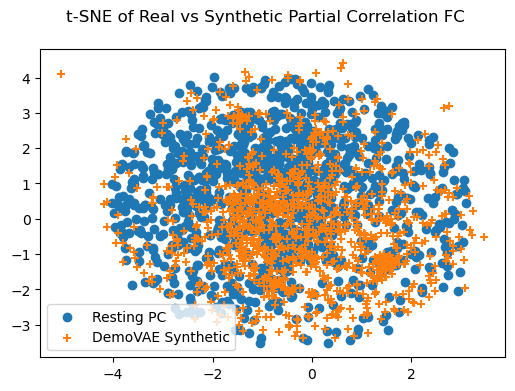

In [137]:
n = len(rest)

fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.scatter(pcaemb[:n,0], pcaemb[:n,1], label='Resting PC')
ax.scatter(pcaemb[n:,0], pcaemb[n:,1], s=35, marker='+', label='DemoVAE Synthetic')

ax.legend()

fig.suptitle('t-SNE of Real vs Synthetic Partial Correlation FC')
# fig.savefig('/home/anton/Documents/Tulane/Research/Work/CL-VAE/tsne-pc.pdf')
fig.show()

/tmp/ipykernel_46333/3478505789.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


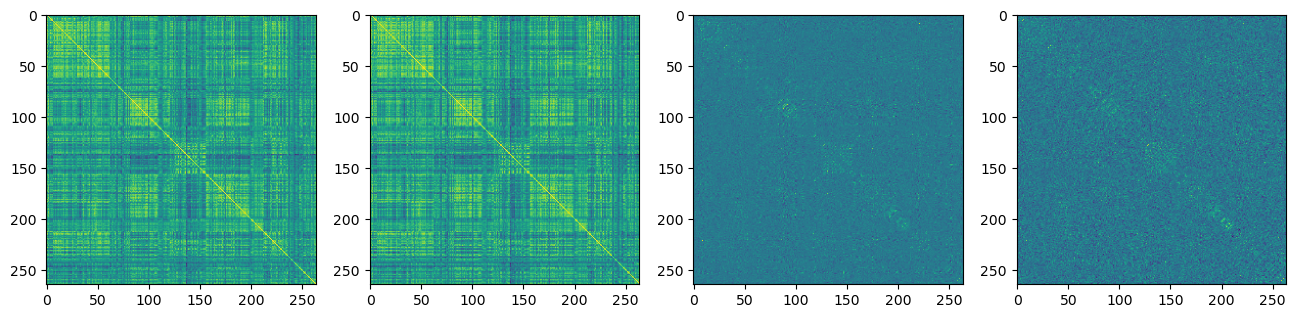

In [4]:
num = 5

diag = np.random.uniform(low=10,high=20,size=(264))
d1 = np.expand_dims(diag,0)
d2 = np.expand_dims(diag,1)
I = vec2mat(nback[num])
savI = I+0
I = 0.99*I+0.01*np.eye(264)
I = I*d1*d2
L = np.linalg.cholesky(I)
x = np.random.normal(loc=0, scale=1, size=(264,200))
Lx = L@x
im = np.corrcoef(Lx)
pc = cm.fit_transform([Lx.T])[0]
pc = pc*(1-np.eye(264))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,4,figsize=(16,4))

ax[0].imshow(savI)
ax[1].imshow(im)
ax[2].imshow(nbackpc[num])
ax[3].imshow(pc)

fig.show()

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, fcd, ld):
        super(VAE, self).__init__()
        self.fcd = fcd
        self.ld = ld
        self.enc1 = nn.Linear(fcd, 1000).float().cuda()
        self.enc2 = nn.Linear(1000, ld).float().cuda()
        self.dec1 = nn.Linear(ld+6, 1000).float().cuda()
        self.dec2 = nn.Linear(1000, fcd).float().cuda()

    def enc(self, x):
        x = F.relu(self.enc1(x))
        z = self.enc2(x)
        return z

    def gen(self, n):
        return torch.randn(n, self.ld).float().cuda()/(10**0.5)
    
    def dec(self, z, age, sex, race, rest, nback, emoid):
        z = torch.cat([z, age.unsqueeze(1), sex.unsqueeze(1), race.unsqueeze(1), 
                       rest.unsqueeze(1), nback.unsqueeze(1), emoid.unsqueeze(1)], dim=1)
        x = F.relu(self.dec1(z))
        x = self.dec2(x)
        return x

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

def pretty(x):
    return f'{round(float(x), 4)}'

vae = VAE(34716, 30)
vae.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/ImageNomer/data/PNC/vae_1000_z30_cov6.torch'))
vae.eval()

print('Done')

Done


/tmp/ipykernel_46333/3165366661.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


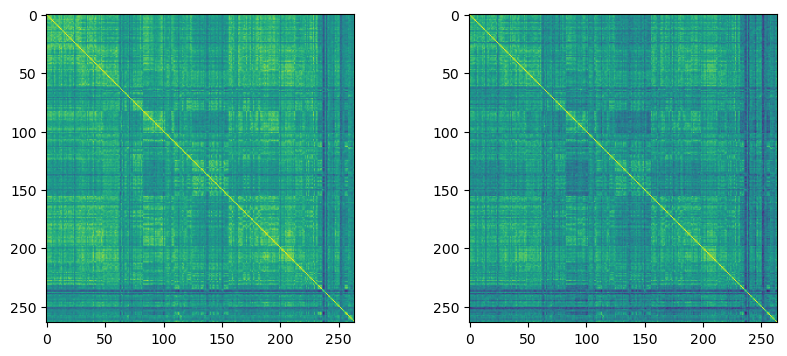

In [51]:
with torch.no_grad():
    z = vae.gen(1)
    ag = torch.randn(1).float().cuda()
    sx = torch.ones(1).float().cuda()
    rc = torch.ones(1).float().cuda()
    re = torch.ones(1).float().cuda()
    nb = 0*torch.ones(1).float().cuda()
    em = 0*torch.ones(1).float().cuda()
    y = vae.dec(z, ag, sx, rc, re, nb, em)
    y = y[0].detach().cpu().numpy()
    y = vec2mat(y)

l, v = np.linalg.eig(y)
l[l<0] = 1e-3
yh = v@np.diag(l)@v.T
L = np.linalg.cholesky(yh)

diag = np.random.uniform(low=10,high=20,size=(264))
d1 = np.expand_dims(diag,0)
d2 = np.expand_dims(diag,1)
I = yh*d1*d2
L = np.linalg.cholesky(I)
x = np.random.normal(loc=0, scale=1, size=(264,200))
Lx = L@x
im = np.corrcoef(Lx)

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(y)
ax[1].imshow(im)
fig.show()